In [108]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import tensorflow as tf


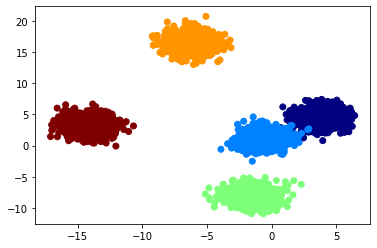

In [3]:
n =1000
cats = 5
dims = 2

x = []
y = []

for i in range(cats):
    x.append(tf.random.normal((n, dims)) + tf.random.normal((1,dims))*10)
    y.append(([tf.range(cats) == i]* n))


x = tf.concat(x, axis = 0)
y = tf.concat(y, axis = 0)

y = tf.cast(y, dtype=tf.float32)

#x_max = tf.max(x, axis = 0).values
#x_min = tf.min(x, axis = 0).values   
#x -=x_min
#x /=x_max - x_min

plt.scatter(x[:,0], x[:,1], c=tf.argmax(y, axis = 1), cmap ='jet' )

    

In [4]:
eta = 1e-2
iterations = 1000

w = tf.random.normal((x.shape[1], y.shape[1]))
b = tf.random.normal((1, y.shape[1]))

for i in range(iterations):
    with tf.GradientTape() as t:
        t.watch([w, b])
        y_hat = x @ w + b
        loss = tf.nn.softmax_cross_entropy_with_logits(y, y_hat)
        grad_w, grad_b = t.gradient(loss, [w, b])
        #opt.apply_gradients([grad_w, w])
        w = w - eta * grad_w
        b = b - eta * grad_b

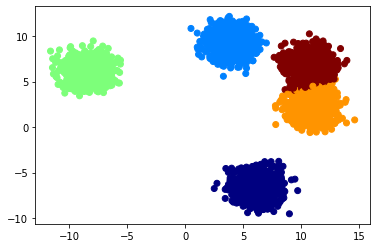

In [77]:
plt.scatter(x[:,0], x[:,1], c = tf.argmax(y_hat, axis = 1), cmap = 'jet' )

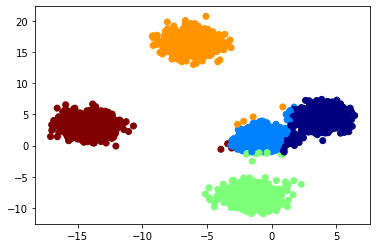

In [5]:
eta = 1e-2
iterations = 100

w = tf.random.normal((x.shape[1], y.shape[1]))
b = tf.random.normal((1, y.shape[1]))
#opt = tf.optimizers.Adam(learning_rate = 1e-2) 
for i in range(iterations):
    with tf.GradientTape() as t:
        t.watch([w, b])
        y_hat = x @ w + b
        loss = tf.nn.softmax_cross_entropy_with_logits(y, y_hat)
        grad_w, grad_b = t.gradient(loss, [w, b])
        #opt.apply_gradients([(grad_w, w)],[(grad_b, b)])
        #opt.apply_gradients(zip((grad_w, grad_b),(w, b)))
        w = w - eta * grad_w
        b = b - eta * grad_b
plt.scatter(x[:,0], x[:,1], c = tf.argmax(y_hat, axis = 1), cmap = 'jet' )        

In [ ]:
############################################################################

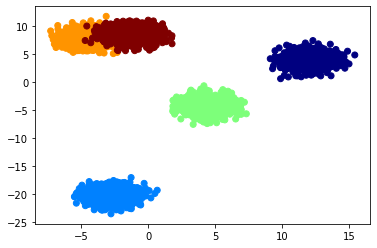

In [43]:
n =1000
cats = 5
dims = 2

x = []
y = []

for i in range(cats):
    x.append(tf.random.normal((n, dims)) + tf.random.normal((1,dims))*10)
    y.append(([tf.range(cats) == i]* n))


x = tf.concat(x, axis = 0)
y = tf.concat(y, axis = 0)

y = tf.cast(y, dtype=tf.float32)

#x_max = tf.max(x, axis = 0).values
#x_min = tf.min(x, axis = 0).values   
#x -=x_min
#x /=x_max - x_min

plt.scatter(x[:,0], x[:,1], c=tf.argmax(y, axis = 1), cmap ='jet' )

    

## Layer 

In [44]:
class Layer:
    def __init__(self, size_in, size_out, activation_func = tf.sigmoid):
        
        self.w = tf.Variable(tf.random.normal((size_in, size_out)))
        self.b = tf.Variable(tf.random.normal((1, size_out)))
        self.activation_func = activation_func
        
    def Forward(self, x):
        return self.activation_func(x @ self.w + self.b)
    
    def Parameters(self):
        return [self.w, self.b]
        

In [45]:
class ThreeLayer:
    def __init__(self, size_in, size_hidden_0, size_hidden_1, size_out):
        
        self.layer_0 = Layer(size_in, size_hidden_0)
        self.layer_1 = Layer(size_hidden_0, size_hidden_1)
        self.layer_2 = Layer(size_hidden_1, size_out)
        
    def Forward(self, x):
        return self.layer_2.Forward(
        self.layer_1.Forward(
        self.layer_0.Forward(x)))
    
    def Parameters(self):
        out = []
        for key, item in self.__dict__.items():
            out.extend(item.Parameters())
        return out

In [46]:
model = ThreeLayer(x.shape[1],4,4,cats)
opt = tf.optimizers.Adam(learning_rate = 1e-2)


In [41]:

iterations = 1000
for i in range(iterations):
    with tf.GradientTape() as t:
        #t.watch(model.Parameters())
        y_hat = model.Forward(x)
        loss = tf.nn.softmax_cross_entropy_with_logits(y, y_hat)
        grads = t.gradient(loss, model.Parameters())
        opt.apply_gradients(zip(grads, model.Parameters()))
        #w = w - eta * grad_w
        #b = b - eta * grad_b

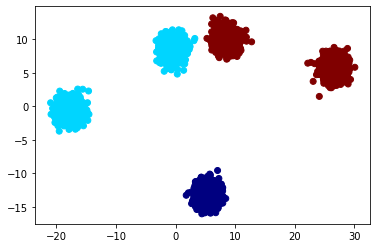

In [42]:
plt.scatter(x[:,0], x[:,1], c = tf.argmax(y_hat, axis = 1), cmap = 'jet' )

## Regularizations

## L1/L2 regularization

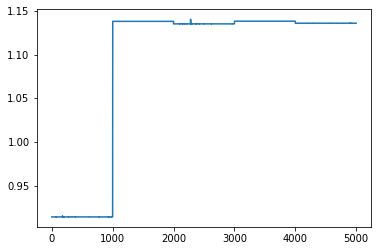

In [47]:
losses = []
lamb_1 = 0.5
lamb_2 = 0.5


iterations = 1000
for i in range(iterations):
    with tf.GradientTape() as t:
        #t.watch(model.Parameters())
        y_hat = model.Forward(x)
        loss = tf.nn.softmax_cross_entropy_with_logits(y, y_hat)
        losses.append(loss.numpy())
        grads = t.gradient(loss, model.Parameters())
        
        for param in model.Parameters():
            param = param - lamb_2 * param -lamb_1 * tf.sign(param)
        opt.apply_gradients(zip(grads, model.Parameters()))
        #w = w - eta * grad_w
        #b = b - eta * grad_b
        
plt.plot(loss)        

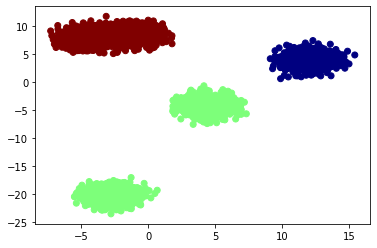

In [48]:
plt.scatter(x[:,0], x[:,1], c = tf.argmax(y_hat, axis = 1), cmap = 'jet' )

## Dropout Regularization

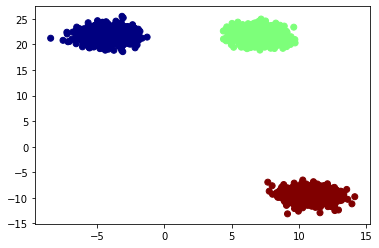

In [89]:
#generate data/cluster

n =1000
cats = 3
dims = 2

x = []
y = []

for i in range(cats):
    x.append(tf.random.normal((n, dims)) + tf.random.normal((1,dims))*10)
    y.append(([tf.range(cats) == i]* n))


x = tf.concat(x, axis = 0)
y = tf.concat(y, axis = 0)

y = tf.cast(y, dtype=tf.float32)

#x_max = tf.max(x, axis = 0).values
#x_min = tf.min(x, axis = 0).values   
#x -=x_min
#x /=x_max - x_min

plt.scatter(x[:,0], x[:,1], c=tf.argmax(y, axis = 1), cmap ='jet' )

    

In [90]:
#Layer classes
class Layer:
    def __init__(self, size_in, size_out, activation_func = tf.sigmoid, dropout_rate = 0):
        
        self.w = tf.Variable(tf.random.normal((size_in, size_out)))
        self.b = tf.Variable(tf.random.normal((1, size_out)))
        self.activation_func = activation_func
        self.dropout_rate = dropout_rate
        
        
    def Forward(self, x):
        z = self.activation_func(x @ self.w + self.b)
        mask = tf.random.uniform (z.shape) > self.dropout_rate
        mask = tf.cast(mask, tf.float32)
        return z * mask
    
    def Parameters(self):
        return [self.w, self.b]
    
    def Predict(self, x):
        return self.activation_func(x @ self.w + self.b)
    
    
    
class ThreeLayer:
    def __init__(self, size_in, size_hidden_0, size_hidden_1, size_out):
        
        self.layer_0 = Layer(size_in, size_hidden_0, dropout_rate = 0.7) ## dropout rate is icorporated in the input layer
        self.layer_1 = Layer(size_hidden_0, size_hidden_1)
        self.layer_2 = Layer(size_hidden_1, size_out)
        
    def Forward(self, x):
        return self.layer_2.Forward(
        self.layer_1.Forward(
        self.layer_0.Forward(x)))
    
    def Predict(self, x):
        return self.layer_2.Predict(
        self.layer_1.Predict(
        self.layer_0.Predict(x)))
    
    def Parameters(self):
        out = []
        for key, item in self.__dict__.items():
            out.extend(item.Parameters())
        return out
        

In [91]:
##Define Model
model = ThreeLayer(x.shape[1],4,4,cats)
opt = tf.optimizers.Adam(learning_rate = 1e-1)


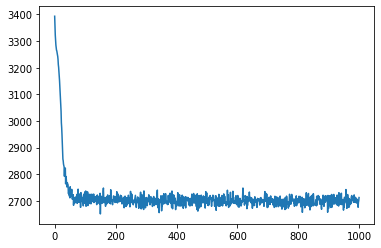

In [92]:
##
losses = []
lamb_1 = 0.5
lamb_2 = 0.5

        

iterations = 1000
for i in range(iterations):
    with tf.GradientTape() as t:
        #t.watch(model.Parameters())
        y_hat = model.Forward(x)
        loss = tf.nn.softmax_cross_entropy_with_logits(y, y_hat)
        losses.append(tf.math.reduce_sum(loss).numpy())
        grads = t.gradient(loss, model.Parameters())
        for param in model.Parameters():
            param = param - lamb_2 * param -lamb_1 * tf.sign(param)
        
        opt.apply_gradients(zip(grads, model.Parameters()))
        #w = w - eta * grad_w
        #b = b - eta * grad_b
        
plt.plot(losses)        

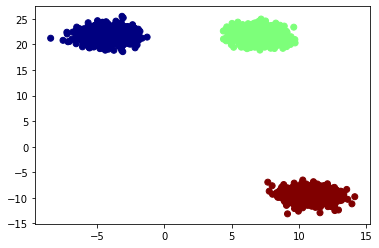

In [93]:
y_hat = model.Predict(x)
plt.scatter(x[:,0], x[:,1], c = tf.argmax(y_hat, axis = 1), cmap = 'jet' )

## Noise Injection

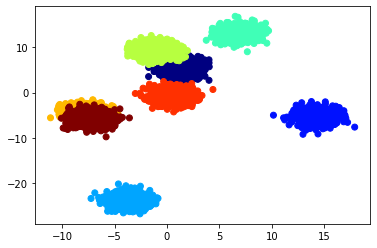

In [99]:
#generate data/cluster

n =1000
cats = 8
dims = 2

x = []
y = []

for i in range(cats):
    x.append(tf.random.normal((n, dims)) + tf.random.normal((1,dims))*10)
    y.append(([tf.range(cats) == i]* n))


x = tf.concat(x, axis = 0)
y = tf.concat(y, axis = 0)

y = tf.cast(y, dtype=tf.float32)

#x_max = tf.max(x, axis = 0).values
#x_min = tf.min(x, axis = 0).values   
#x -=x_min
#x /=x_max - x_min

plt.scatter(x[:,0], x[:,1], c=tf.argmax(y, axis = 1), cmap ='jet' )

    

In [100]:
#Layer classes
class Layer:
    def __init__(self, size_in, size_out, activation_func = tf.sigmoid, dropout_rate = 0, noise_rate = 0):
        
        self.w = tf.Variable(tf.random.normal((size_in, size_out)))
        self.b = tf.Variable(tf.random.normal((1, size_out)))
        self.activation_func = activation_func
        self.dropout_rate = dropout_rate
        self.noise_rate = noise_rate
        
    def Forward(self, x):
        z     = self.activation_func(x @ self.w + self.b)
        noise = tf.random.normal(z.shape) * self.noise_rate
        mask  = tf.random.uniform (z.shape) > self.dropout_rate
        mask  = tf.cast(mask, tf.float32)
        return (z + noise)* mask
    
    def Parameters(self):
        return [self.w, self.b]
    
    def Predict(self, x):
        return self.activation_func(x @ self.w + self.b)
    
    
    
class ThreeLayer:
    def __init__(self, size_in, size_hidden_0, size_hidden_1, size_out):
        
        self.layer_0 = Layer(size_in, size_hidden_0, dropout_rate = 0.7, noise_rate = 0.5 ) ## dropout rate is icorporated in the input layer
        self.layer_1 = Layer(size_hidden_0, size_hidden_1)
        self.layer_2 = Layer(size_hidden_1, size_out)
     
    ##we call forward to train with the noises and dropouts to make it stronger
    def Forward(self, x):
        return self.layer_2.Forward(
        self.layer_1.Forward(
        self.layer_0.Forward(x)))
   
    ### we call predict coz we wanna predict without the noises and dropouts 
    def Predict(self, x):
        return self.layer_2.Predict(
        self.layer_1.Predict(
        self.layer_0.Predict(x)))
    
    def Parameters(self):
        out = []
        for key, item in self.__dict__.items():
            out.extend(item.Parameters())
        return out
        

In [101]:
##Define Model
model = ThreeLayer(x.shape[1],6,7,cats)
opt = tf.optimizers.Adam(learning_rate = 1e-1)


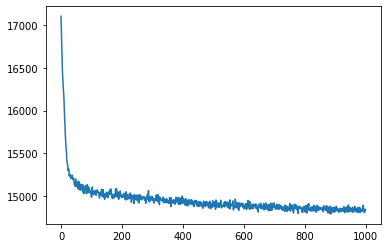

In [102]:
##
losses = []
lamb_1 = 0.5
lamb_2 = 0.5

        

iterations = 1000
for i in range(iterations):
    with tf.GradientTape() as t:
        #t.watch(model.Parameters())
        y_hat = model.Forward(x)
        loss = tf.nn.softmax_cross_entropy_with_logits(y, y_hat)
        losses.append(tf.math.reduce_sum(loss).numpy())
        grads = t.gradient(loss, model.Parameters())
        for param in model.Parameters():
            param = param - lamb_2 * param -lamb_1 * tf.sign(param)
        
        opt.apply_gradients(zip(grads, model.Parameters()))
        #w = w - eta * grad_w
        #b = b - eta * grad_b
        
plt.plot(losses)        

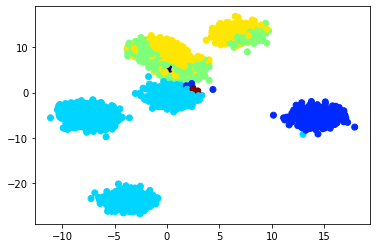

In [103]:
y_hat = model.Predict(x)
plt.scatter(x[:,0], x[:,1], c = tf.argmax(y_hat, axis = 1), cmap = 'jet' )

## prevent overfitting

## early stopping

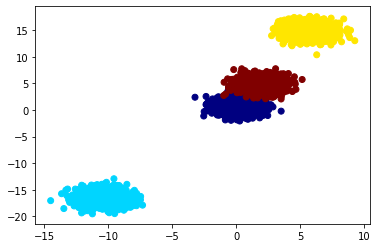

In [136]:
#generate data/cluster

n =1000
cats = 4
dims = 2

x = []
y = []

for i in range(cats):
    x.append(tf.random.normal((n, dims)) + tf.random.normal((1,dims))*10)
    y.append(([tf.range(cats) == i]* n))


x = tf.concat(x, axis = 0)
y = tf.concat(y, axis = 0)

y = tf.cast(y, dtype=tf.float32)

#x_max = tf.max(x, axis = 0).values
#x_min = tf.min(x, axis = 0).values   
#x -=x_min
#x /=x_max - x_min

plt.scatter(x[:,0], x[:,1], c=tf.argmax(y, axis = 1), cmap ='jet' )

    

In [137]:
#Layer classes
class Layer:
    def __init__(self, size_in, size_out, activation_func = tf.sigmoid, dropout_rate = 0, noise_rate = 0):
        
        self.w = tf.Variable(tf.random.normal((size_in, size_out)))
        self.b = tf.Variable(tf.random.normal((1, size_out)))
        self.activation_func = activation_func
        self.dropout_rate = dropout_rate
        self.noise_rate = noise_rate
        
    def Forward(self, x):
        z     = self.activation_func(x @ self.w + self.b)
        noise = tf.random.normal(z.shape) * self.noise_rate
        mask  = tf.random.uniform (z.shape) > self.dropout_rate
        mask  = tf.cast(mask, tf.float32)
        return (z + noise)* mask
    
    def Parameters(self):
        return [self.w, self.b]
    
    def Predict(self, x):
        return self.activation_func(x @ self.w + self.b)
    
    
    
class ThreeLayer:
    def __init__(self, size_in, size_hidden_0, size_hidden_1, size_out):
        
        self.layer_0 = Layer(size_in, size_hidden_0, dropout_rate = 0, noise_rate = 0) ## dropout rate is icorporated in the input layer
        self.layer_1 = Layer(size_hidden_0, size_hidden_1)
        self.layer_2 = Layer(size_hidden_1, size_out)
     
    ##we call forward to train with the noises and dropouts to make it stronger
    def Forward(self, x):
        return self.layer_2.Forward(
        self.layer_1.Forward(
        self.layer_0.Forward(x)))
   
    ### we call predict coz we wanna predict without the noises and dropouts 
    def Predict(self, x):
        return self.layer_2.Predict(
        self.layer_1.Predict(
        self.layer_0.Predict(x)))
    
    def Parameters(self):
        out = []
        for key, item in self.__dict__.items():
            out.extend(item.Parameters())
        return out
        

In [138]:
##Define Model
model = ThreeLayer(x.shape[1],6,7,cats)
opt = tf.optimizers.Adam(learning_rate = 1e-1)


Iterations: 59 | Loss:3121.729736328125 

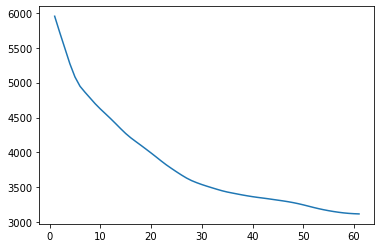

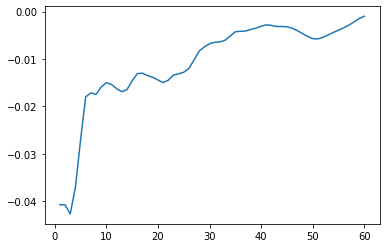

In [139]:
##
losses = [np.inf]
loss_diffs = []
lamb_1 = 0.5
lamb_2 = 0.5

        

iterations = 1000
for i in range(iterations):
    with tf.GradientTape() as t:
        #t.watch(model.Parameters())
        y_hat = model.Forward(x)
        loss = tf.nn.softmax_cross_entropy_with_logits(y, y_hat)
        losses.append(tf.math.reduce_sum(loss).numpy())
        
        #loss_diff = loss - losses[-1]
        loss_diff = (losses[-1] - losses[-2])/ losses[-1]
        loss_diffs.append(loss_diff)
        
        grads = t.gradient(loss, model.Parameters())
        for param in model.Parameters():
            param = param - lamb_2 * param -lamb_1 * tf.sign(param)
        
        opt.apply_gradients(zip(grads, model.Parameters()))
        #w = w - eta * grad_w
        #b = b - eta * grad_b
    
    if np.abs(loss_diff) < 1e-3:
        break
        
    print('\rIterations: {} | Loss:{} '.format(i, losses[-1]), end = '')
plt.plot(losses)
plt.show()
plt.plot(loss_diffs)

## Moving averages

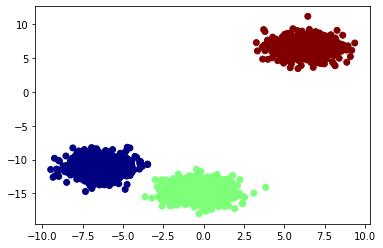

In [140]:
#generate data/cluster

n =1000
cats = 3
dims = 2

x = []
y = []

for i in range(cats):
    x.append(tf.random.normal((n, dims)) + tf.random.normal((1,dims))*10)
    y.append(([tf.range(cats) == i]* n))


x = tf.concat(x, axis = 0)
y = tf.concat(y, axis = 0)

y = tf.cast(y, dtype=tf.float32)

#x_max = tf.max(x, axis = 0).values
#x_min = tf.min(x, axis = 0).values   
#x -=x_min
#x /=x_max - x_min

plt.scatter(x[:,0], x[:,1], c=tf.argmax(y, axis = 1), cmap ='jet' )

    

In [141]:
#Layer classes
class Layer:
    def __init__(self, size_in, size_out, activation_func = tf.sigmoid, dropout_rate = 0, noise_rate = 0):
        
        self.w = tf.Variable(tf.random.normal((size_in, size_out)))
        self.b = tf.Variable(tf.random.normal((1, size_out)))
        self.activation_func = activation_func
        self.dropout_rate = dropout_rate
        self.noise_rate = noise_rate
        
    def Forward(self, x):
        z     = self.activation_func(x @ self.w + self.b)
        noise = tf.random.normal(z.shape) * self.noise_rate
        mask  = tf.random.uniform (z.shape) > self.dropout_rate
        mask  = tf.cast(mask, tf.float32)
        return (z + noise)* mask
    
    def Parameters(self):
        return [self.w, self.b]
    
    def Predict(self, x):
        return self.activation_func(x @ self.w + self.b)
    
    
    
class ThreeLayer:
    def __init__(self, size_in, size_hidden_0, size_hidden_1, size_out):
        
        self.layer_0 = Layer(size_in, size_hidden_0, dropout_rate = 0, noise_rate = 0) ## dropout rate is icorporated in the input layer
        self.layer_1 = Layer(size_hidden_0, size_hidden_1)
        self.layer_2 = Layer(size_hidden_1, size_out)
     
    ##we call forward to train with the noises and dropouts to make it stronger
    def Forward(self, x):
        return self.layer_2.Forward(
        self.layer_1.Forward(
        self.layer_0.Forward(x)))
   
    ### we call predict coz we wanna predict without the noises and dropouts 
    def Predict(self, x):
        return self.layer_2.Predict(
        self.layer_1.Predict(
        self.layer_0.Predict(x)))
    
    def Parameters(self):
        out = []
        for key, item in self.__dict__.items():
            out.extend(item.Parameters())
        return out
        

In [142]:
##Define Model
model = ThreeLayer(x.shape[1],6,7,cats)
opt = tf.optimizers.Adam(learning_rate = 1e-1)


Iterations: 656 | Loss:1654.70654296875 5 

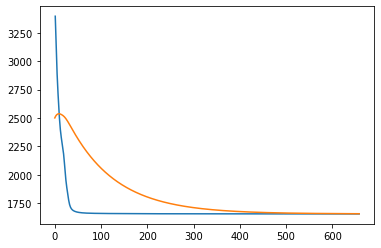

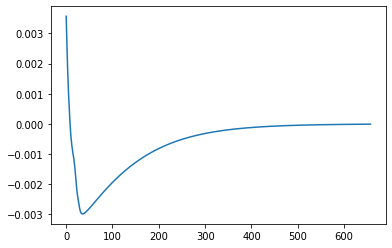

In [143]:
##
losses = [np.inf]
loss_avg = 2500
loss_avgs = [loss_avg]
loss_diffs = []

p = 0.99
q = 1-p

lamb_1 = 0.5
lamb_2 = 0.5

        

iterations = 1000
for i in range(iterations):
    with tf.GradientTape() as t:
        #t.watch(model.Parameters())
        y_hat = model.Forward(x)
        loss = tf.nn.softmax_cross_entropy_with_logits(y, y_hat)
        losses.append(tf.math.reduce_sum(loss).numpy())
        
        
        loss_avg = p * loss_avg + q * losses[-1]
        loss_avgs.append(loss_avg)
        
        ##moving average of the loss 
        loss_diff =(loss_avgs[-1] - loss_avgs[-2])/ loss_avgs[-1]
        loss_diffs.append(loss_diff)
        
        
        grads = t.gradient(loss, model.Parameters())
        for param in model.Parameters():
            param = param - lamb_2 * param -lamb_1 * tf.sign(param)
        
        opt.apply_gradients(zip(grads, model.Parameters()))
        #w = w - eta * grad_w
        #b = b - eta * grad_b
    
    if np.abs(loss_diff) < 1e-5:
        break
        
    print('\rIterations: {} | Loss:{} '.format(i, losses[-1]), end = '')
plt.plot(losses)
plt.plot(loss_avgs)
plt.show()
plt.plot(loss_diffs)

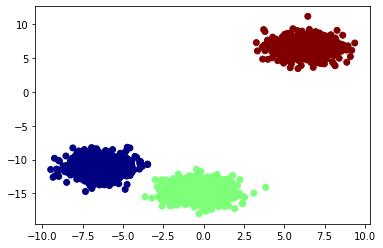

In [144]:
y_hat = model.Predict(x)
plt.scatter(x[:,0], x[:,1], c = tf.argmax(y_hat, axis = 1), cmap = 'jet' )

In [145]:
##optimizers

## Accelerating GD

In [ ]:
##Define Model
model = ThreeLayer(x.shape[1],6,7,cats)
opt = tf.optimizers.Adam(learning_rate = 1e-1)


In [ ]:
##
losses = [np.inf]
loss_avg = 2500
loss_avgs = [loss_avg]
loss_diffs = []
learn_rate = 1e-3

p = 0.99
q = 1-p

lamb_1 = 0.5
lamb_2 = 0.5

mu = 0.9
velocities = []
for param in model.Parameters():
    velocities.append (tf.zeros(param.shape))

    

iterations = 1000
for i in range(iterations):
    with tf.GradientTape() as t:
        #t.watch(model.Parameters())
        y_hat = model.Forward(x)
        loss = tf.nn.softmax_cross_entropy_with_logits(y, y_hat)
        losses.append(tf.math.reduce_sum(loss).numpy())
        
        
        loss_avg = p * loss_avg + q * losses[-1]
        loss_avgs.append(loss_avg)
        
        ##moving average of the loss 
        loss_diff =(loss_avgs[-1] - loss_avgs[-2])/ loss_avgs[-1]
        loss_diffs.append(loss_diff)
        
        
        grads = t.gradient(loss, model.Parameters())
        for param in model.Parameters():
            param = param - lamb_2 * param -lamb_1 * tf.sign(param)
        
#        opt.apply_gradients(zip(grads, model.Parameters()))
        #w = w - eta * grad_w
        #b = b - eta * grad_b
        
        for velocity, grad, weight in (zip(velocities, grad, model.Parameters())):
            velocity = mu * velocity - learn_rate * grad
            weight = weight - velocity 
            
        
    if np.abs(loss_diff) < 1e-6:
        break
        
    print('\rIterations: {} | Loss:{} '.format(i, losses[-1]), end = '')
plt.plot(losses)
plt.plot(loss_avgs)
plt.show()
plt.plot(loss_diffs)